In this Notebook, We look at the country's GHCND stations, in my case IRAN GHCND country, but You can look at other country's GHCND stations with slightly different. 

For more information, You can check out [the National Centers for Environmental Information website](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) or the repository files of this Notebook like [README.txt](https://github.com/amirho3einsedaghati/DataScience/blob/master/Study%20on%20GHCND%20Stations/datasets/README.txt) or [GHCND_documentation.pdf](https://github.com/amirho3einsedaghati/DataScience/blob/master/Study%20on%20GHCND%20Stations/datasets/GHCND_documentation.pdf)   

## 1. Set required directories

In [1]:
import pandas as pd
import regex as re
import os
import shutil

**Befor running the further cells, You should change the values of the `filename` and `filepath` variables.**

In [2]:
name = 'IRAN-GHCN-Stations'
filepath = 'datasets/IRAN-GHCN-Stations.txt'

paths = {'source' : os.path.join('datasets'),
       'destination' : os.path.join('datasets', name)}

In [3]:
if not os.path.exists(paths['destination']):
    if os.name == 'nt':
        os.makedirs(paths['destination'])
    if os.name == 'posix':
        os.makedirs(paths['destination'])

## 2. Install and Import wget on windows machine

In [4]:
def install_wget(anaconda_path:str):
    if not os.path.exists(os.path.join(anaconda_path, 'Lib', 'site-packages', 'wget.py')) and os.name == 'nt':
        !pip install --use-pep517 wget
        
    import wget

In [5]:
# You must change the following path to your Anaconda path 
install_wget('F:\programs\Anaconda')

## 3. Create  a text file for the GHCN stations of a country :

In [6]:
def create_txtf_GHCN_stations(countryAbrrev:str):
    if not os.path.exists('datasets/' + name + '.txt'):
        # Read the GHCN-Stations.txt text file
        df1 = pd.read_fwf('datasets/GHCN-Stations.txt')
        # Then manipulate it
        df1 = df1.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis= 1)
        col = df1.columns 
        df1.columns = ['stationID', 'latitude', 'longitude', 'elevation', 'state_name'] 
        df2 = pd.DataFrame(col).T
        df2.columns = df1.columns
        # Clear the existing index and reset it in the result by setting the ``ignore_index`` option to ``True``.
        concatdf = pd.concat([df1, df2], ignore_index=True, join='inner')

        # Add 'Abrrev.' feature to each feature of the concatdf
        def country_abbreviation(record):
            record['Abrrev.'] = re.search('[A-Z]{2}', str(record['stationID'])).group()
            return record 

        concatdf = concatdf.apply(lambda x: country_abbreviation(x), axis= 1)

        # Find the required station ID 
        stationIDs = concatdf[concatdf['Abrrev.'] == countryAbrrev]['stationID'].tolist()
        # And then filter each instance, our required stations, from the concatdf
        stations = concatdf[concatdf['stationID'].isin(stationIDs)]

        # The context manager in the follwoing command first create a text file, 
        # And then write on the information of the required stations
        with open(file='datasets/' + name + '.txt', mode='w') as f:
            for key, value in stations.iterrows():
                for i in range(len(value)):
                    if 0 <= i < 4:
                        f.write(str(value[i]) + '\t')
                    if i == 4:
                        f.write(str(value[i]) + '\n')
            f.close()                    
            

In [7]:
create_txtf_GHCN_stations('IR')

## 4. Load and Manipulate the Station's dataframe

In [8]:
# we should pass in the created GHCN text file
def load_stations_df():
    # Read the created GHCN text file
    df = pd.read_csv(filepath, sep='\t', names=['stationID', 'latitude',
                                                           'longitude', 'elevation', 'state_name'])
    return df

In [9]:
load_stations_df().head()

,stationID,latitude,longitude,elevation,state_name
0,IR000040706,38.080,46.280,1361.0,TABRIZ
1,IR000040745,36.267,59.633,999.0,MASHHAD
2,IR000040841,30.250,56.967,1754.0,KERMAN
3,IR000040848,29.533,52.533,1481.0,SHIRAZ
4,IR000407540,35.683,51.317,1191.0,TEHRAN-MEHRABAD


In [10]:
load_stations_df().shape

(35, 5)

In [11]:
iran = load_stations_df()
iran = (iran.replace('\sINTL', '', regex=True)
           .rename(columns={'state_name' : 'state/city_name'}))
iran['state/city_name'] = iran['state/city_name'].replace('\s', '', regex=True)
iran = iran.replace(['TEHRAN-MEHRABAD', 'ESFAHANSHAHIDBEHESHTI', 'YAZDSHAHIDSADOOGHI'], ['TEHRAN', 'ESFAHAN', 'YAZD'])
iran

,stationID,latitude,longitude,elevation,state/city_name
0,IR000040706,38.080,46.280,1361.0,TABRIZ
1,IR000040745,36.267,59.633,999.0,MASHHAD
2,IR000040841,30.250,56.967,1754.0,KERMAN
3,IR000040848,29.533,52.533,1481.0,SHIRAZ
4,IR000407540,35.683,51.317,1191.0,TEHRAN
5,IR000407660,34.267,47.117,1322.0,KERMANSHAH
6,IR000408560,29.476,60.907,1378.0,ZAHEDAN
7,IR000408570,28.950,50.850,8.0,BUSHEHR
8,IRM00040708,38.250,48.283,1332.0,ARDEBIL
9,IRM00040712,37.668,45.069,1324.1,UROMIYEH


## 3X. Download all of the .dly station's files around the world in the ghcnd_all.tar.gz file (OPTIONAL)

**note:** just if you need `all` of the .dly station's files, run the following cell. It has about 20GB volume and more than 100,000 instances.

In [12]:
def download_all_GHCND_dly_files():
    import wget
    ghcnd = 'ghcnd_all.tar.gz'
    
    if not os.path.exists(os.path.join(paths['source']), 'ghcnd_all') and os.name == 'nt':
        url = 'https://www.ncei.noaa.gov/pub/data/ghcn/daily/' + ghcnd
        # download files and put them into your root directory by default
        wget.download(url, out=paths['source'])
        !cd {paths['source']} && tar -zxvf {ghcnd} && del {ghcnd}
        
    if not os.path.exists(os.path.join(paths['source']), 'ghcnd_all') and os.name == 'posix':
        url = 'https://www.ncei.noaa.gov/pub/data/ghcn/daily/' + ghcnd
        !wget {url}
        !mv ghcnd_all.tar.gz {paths['source']}
        !cd {paths['source']} && tar -zxvf {ghcnd} && rm {ghcnd}

In [13]:
# download_all_GHCND_dly_files()

## 3. Download the required .dly files in the all directory

In [14]:
# we should pass in the created GHCN text file
def download_required_GHCND_dly_files():  
    import wget
    url = 'https://www.ncei.noaa.gov/pub/data/ghcn/daily/all/'
    IDs = load_stations_df()['stationID'].tolist()
    
    if not os.path.exists(os.path.join(paths['source'], 'ghcnd_all')) and os.name == 'nt':
        !mkdir {os.path.join(paths['source'], 'ghcnd_all')}
        for ID in IDs:
            wget.download(url + ID + '.dly', out=os.path.join(paths['source'], 'ghcnd_all'))
            
    if not os.path.exists(os.path.join(paths['source'], 'ghcnd_all')) and os.name == 'posix':
        !mkdir -p {os.path.join(paths['source'], 'ghcnd_all')}
        for ID in IDs:
            !wget {url + ID + '.dly'}
            !mv {ID + '.dly'} {os.path.join(paths['source'], 'ghcnd_all')}

In [15]:
download_required_GHCND_dly_files()

100% [............................................................................] 448200 / 448200

## 4. Copy the related .dly files from the ghcnd_all directory to the destination path

**befor running further cells, You should change the src_dir value to the path in which is there all of the .dly station's files, the ghcnd_all path, and also change the dst_dir to the path which is related to the .dly files of a country.**

**note : `don't delete \{} from the end of the dst_dir path`**

In [16]:
src_dir = 'E:\my_github_repositories\DataScience\Study on GHCND Stations\datasets\ghcnd_all'
dst_dir = 'E:\my_github_repositories\DataScience\Study on GHCND Stations\datasets\{}'

in this case, we copy IRAN GHCN station data based on the stationID feature in GHCN-Stations_in_Iran.csv file.

In [17]:
# .iterrows() -> returns 2 values, key and value.
# `key` corresponds to each row index and `value` corresponds to each row feature using a Series dataset.
# for example, the first row has the key 0 and the value # stationID     IR000040706
                                                         # latitude            38.08
                                                         # logitude            46.28
                                                         # elevation          1361.0
                                                         # state_name        TABRIZ 
                                                         # Name: 0, dtype: object

for key, value in iran.iterrows():
    os.chdir(src_dir) # Change the current working directory to the specified path.
    for filename in os.listdir(): # traverse all of the station's files in the ghcnd_all directory to find Iran GHCN Stations
        if filename.endswith('.dly'):
            pathname, file_ext = os.path.splitext(filename) # Split the file extension from the pathname.
            # value[0] -> refers to each row stationID 
            if pathname == value[0]:
                shutil.copy(src=os.path.join(src_dir, filename), dst=dst_dir.format(name)) # copy that filename

## 5. Create .csv and .png files using the Time Series of precipitation, and plotting them

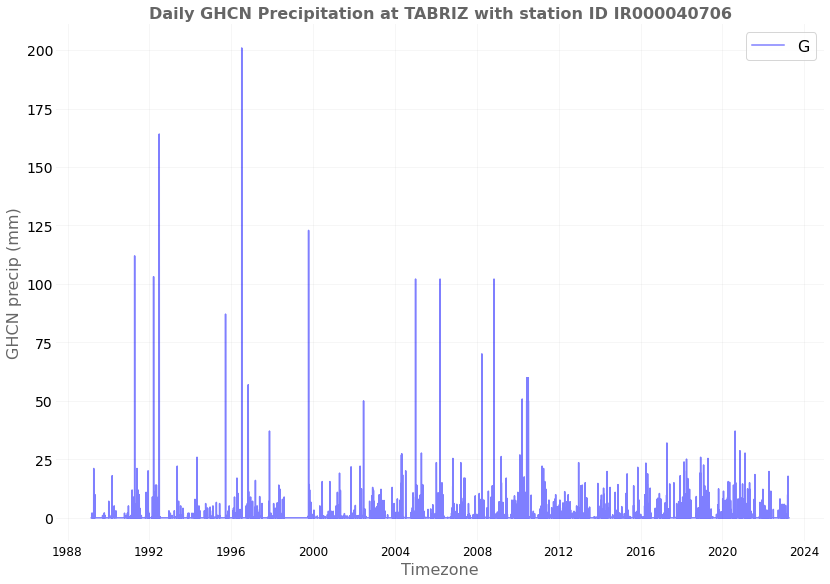

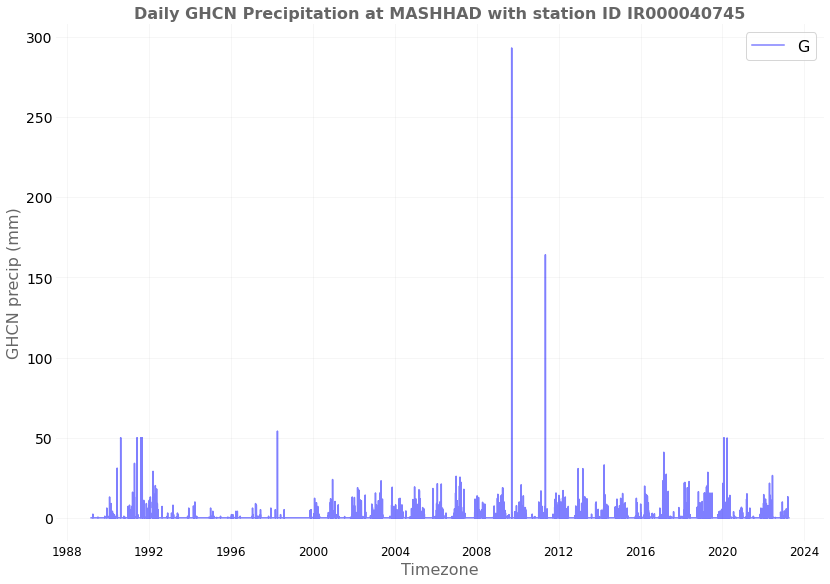

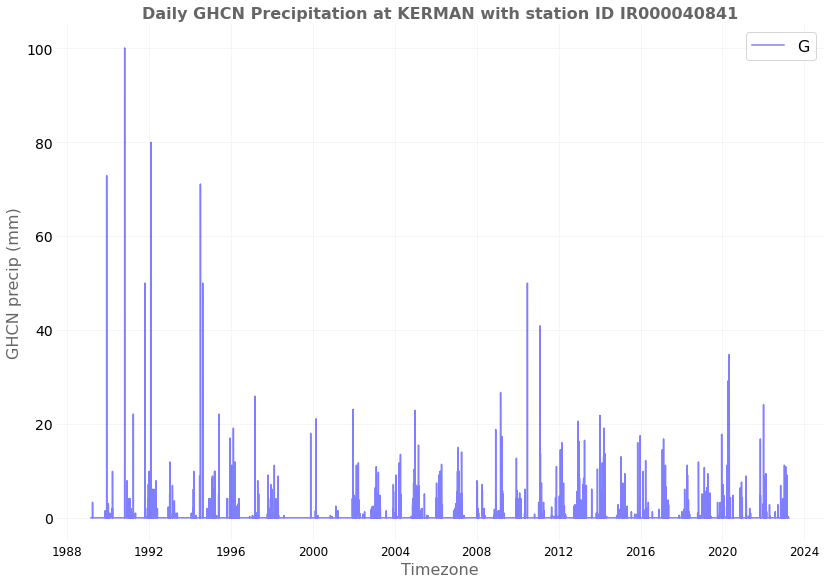

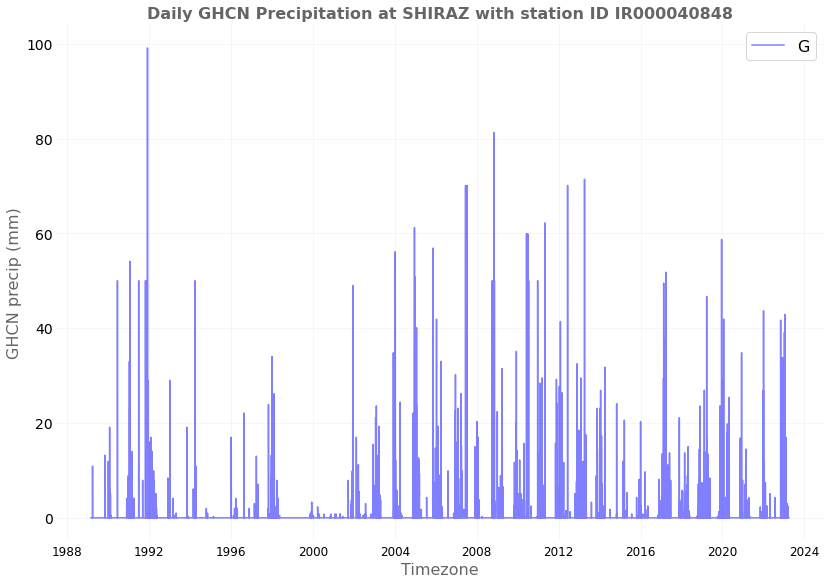

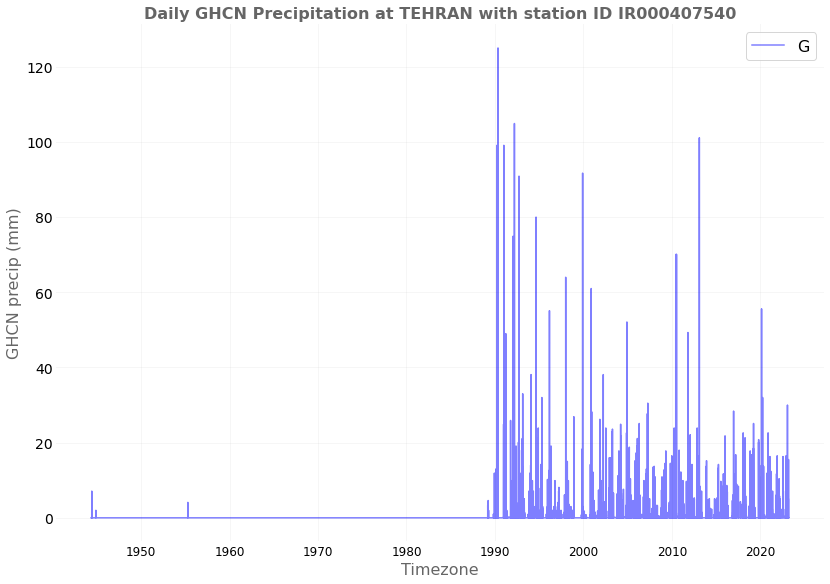

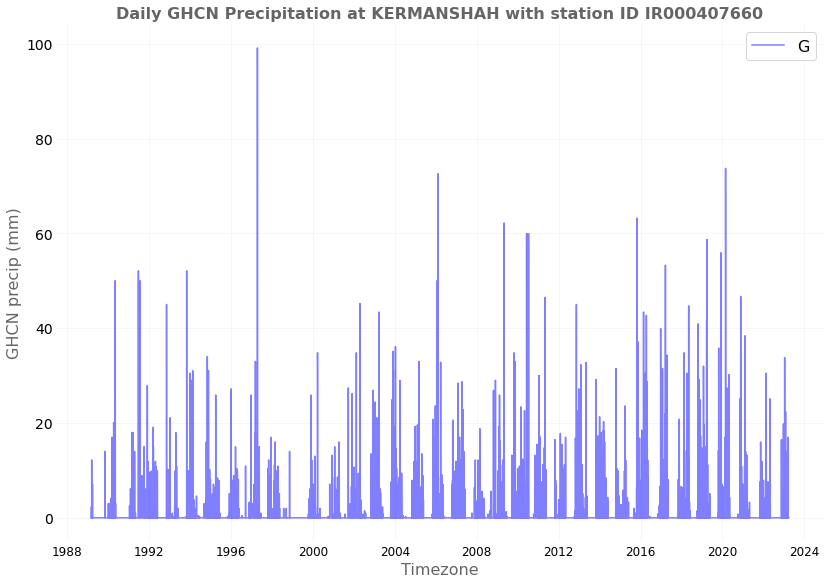

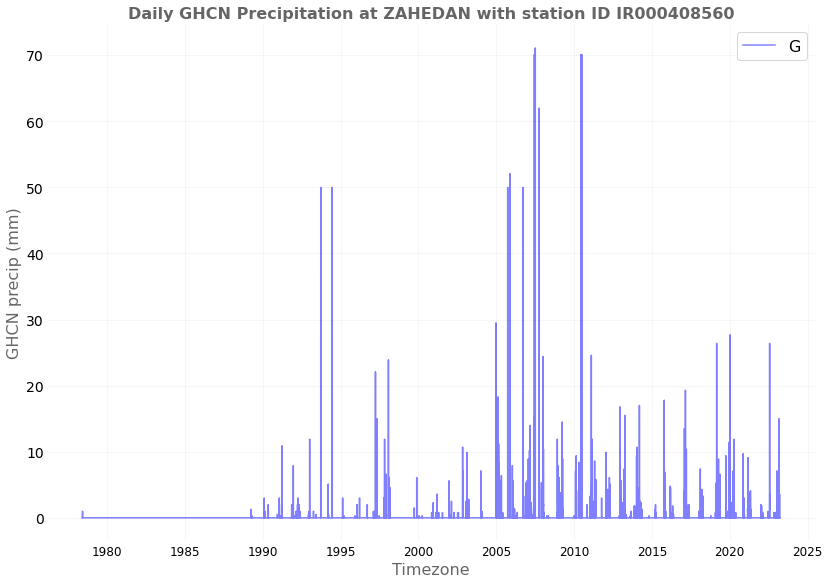

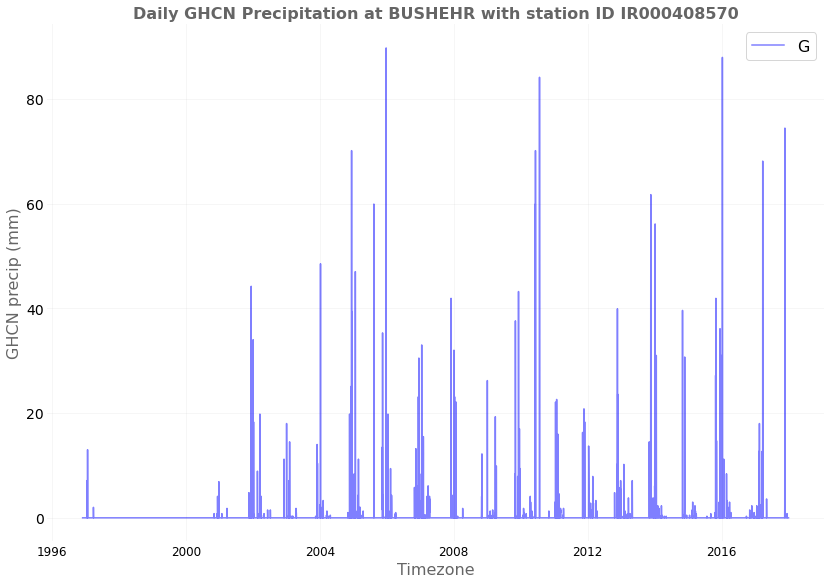

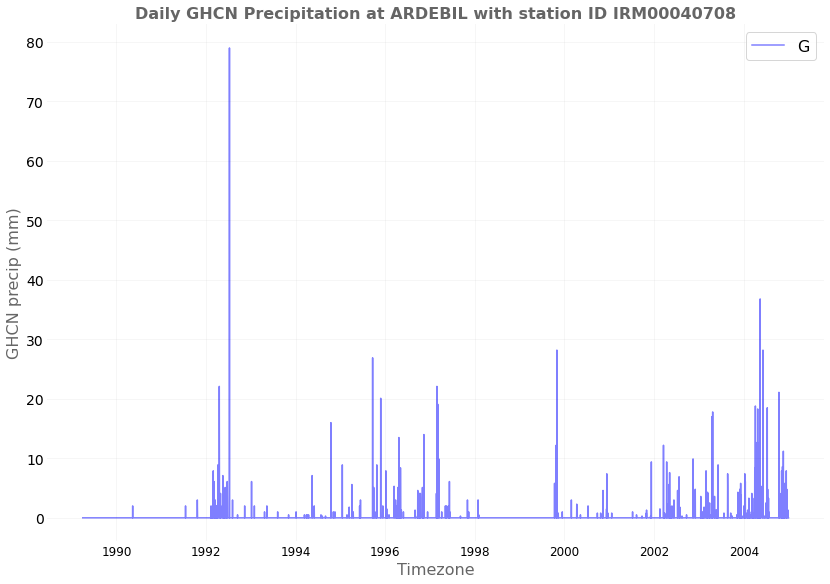

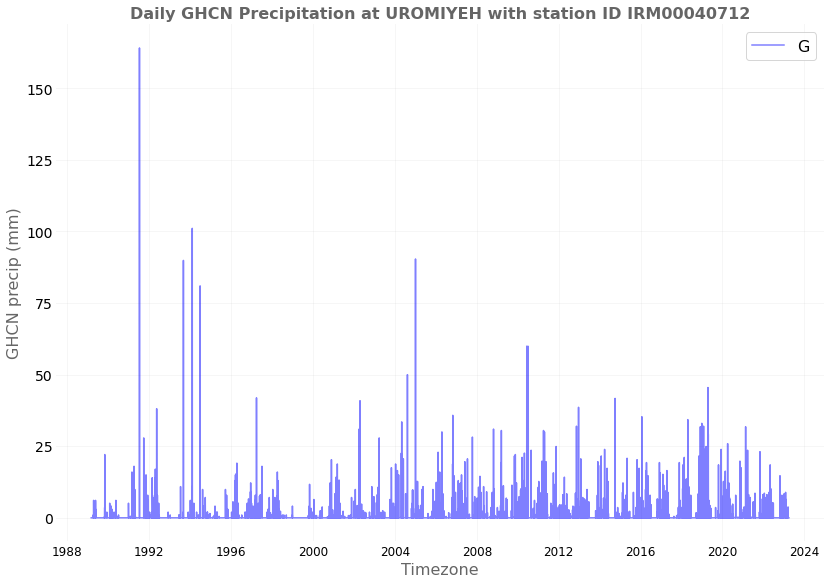

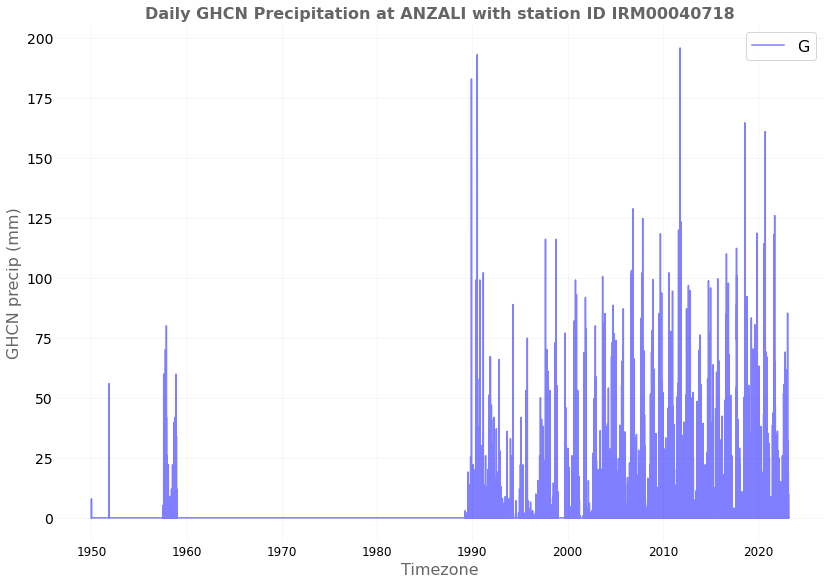

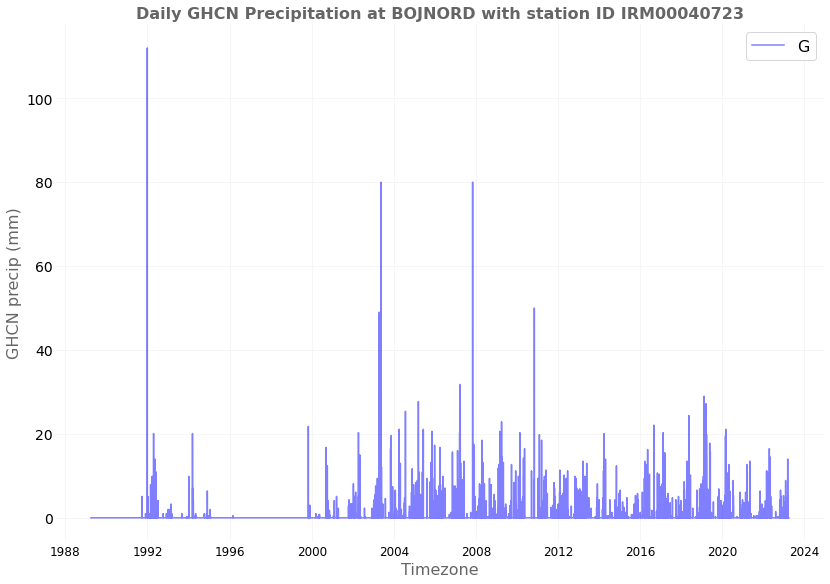

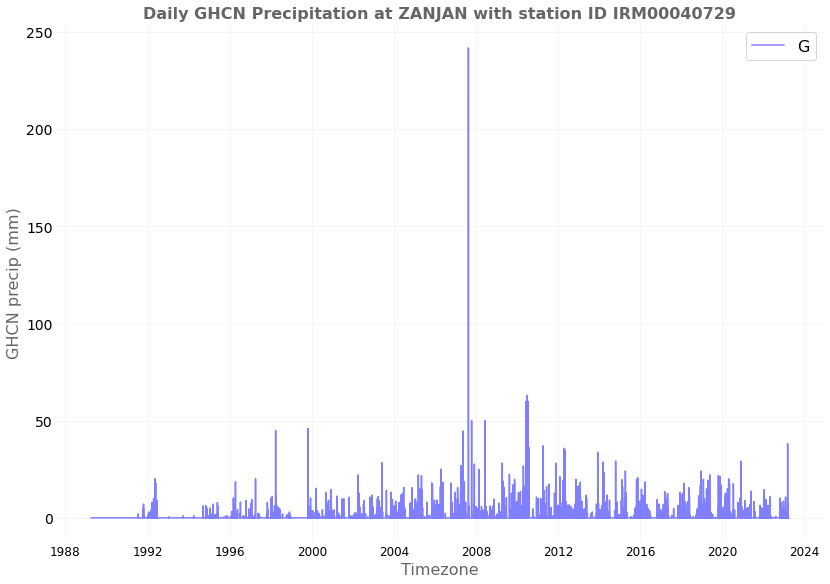

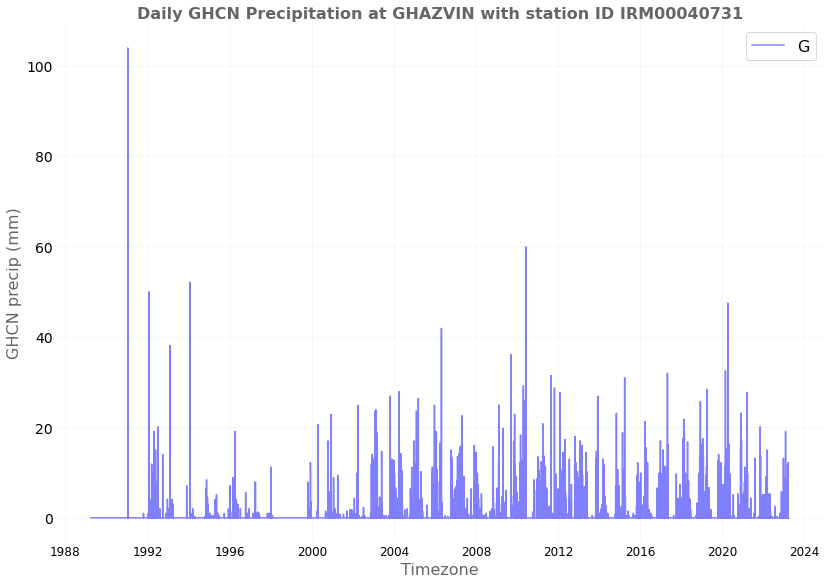

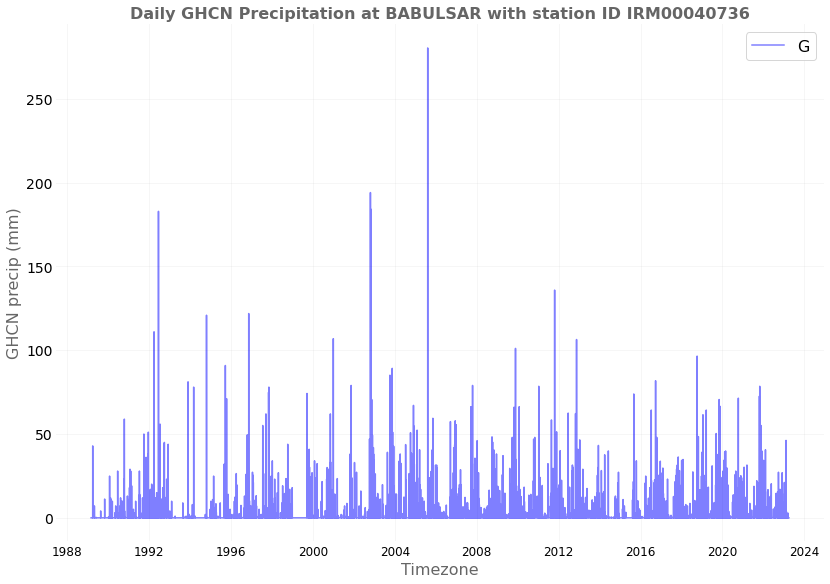

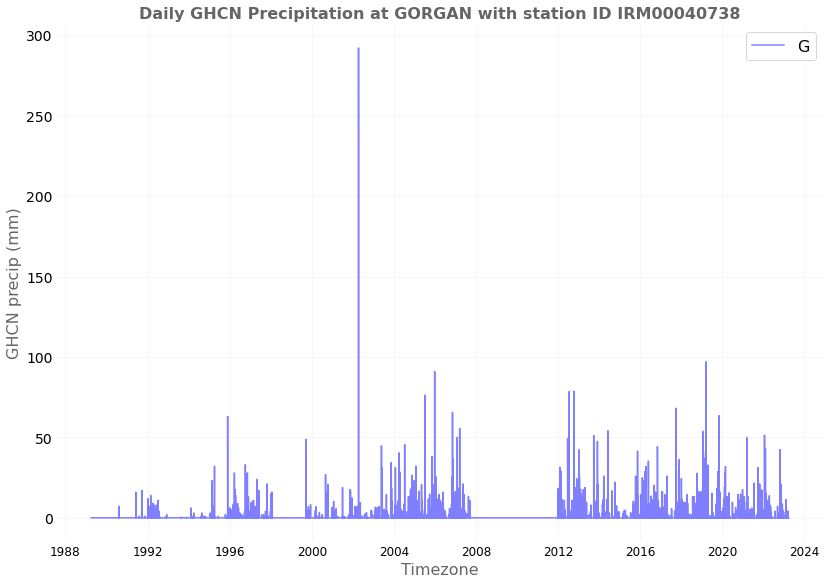

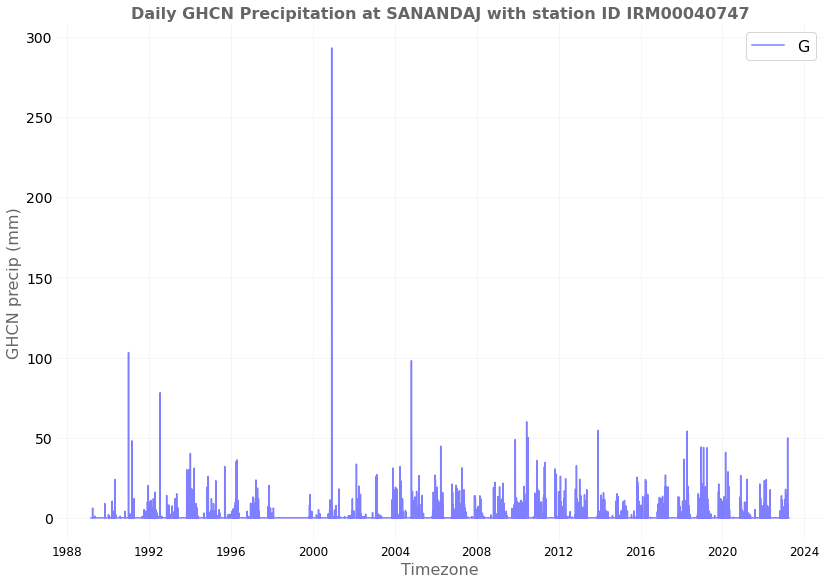

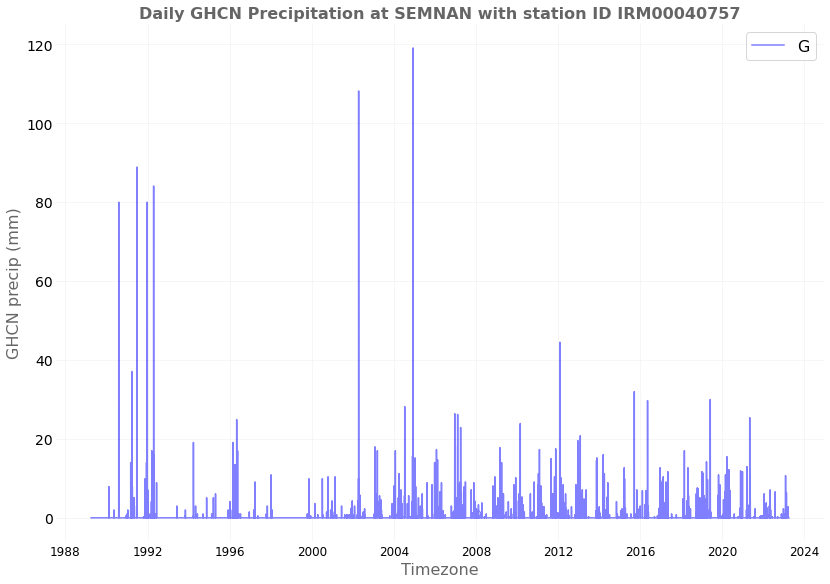

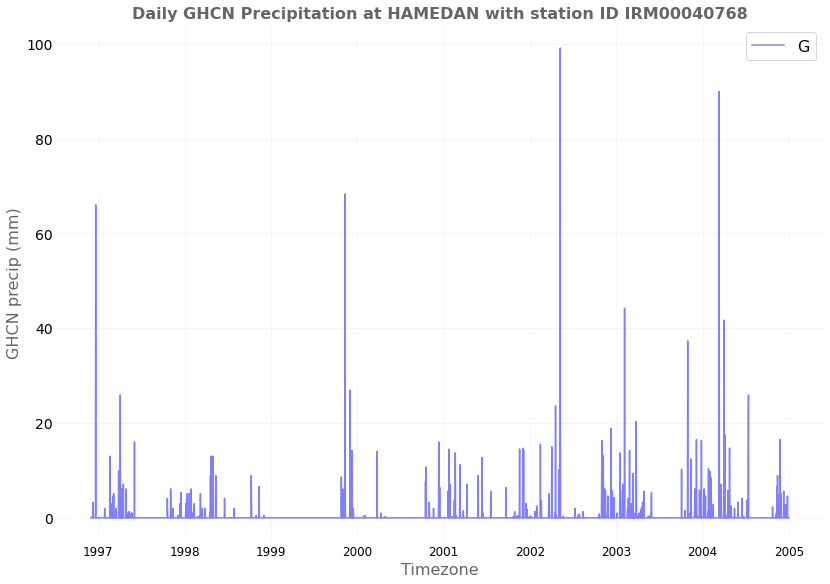

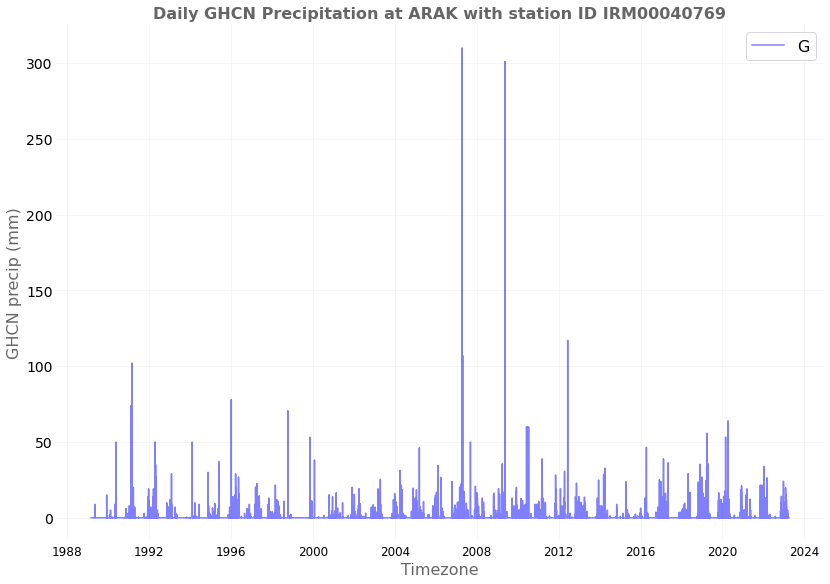

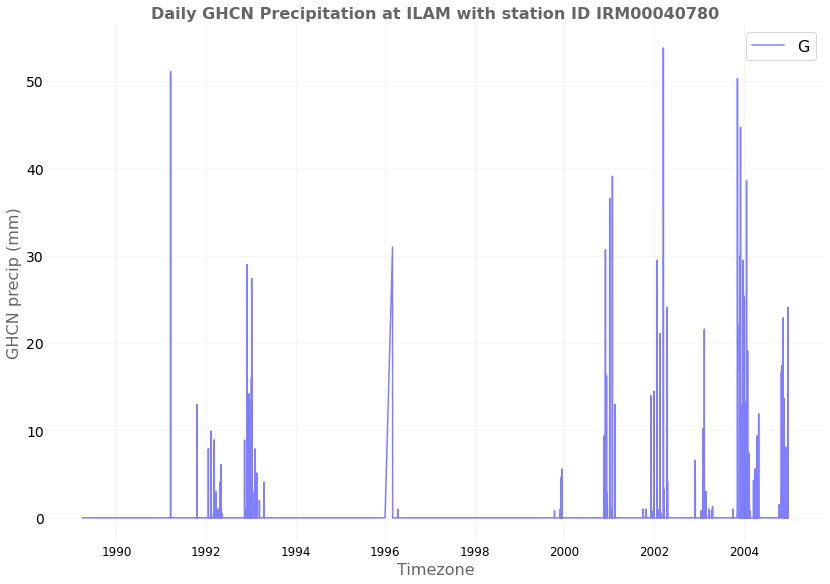

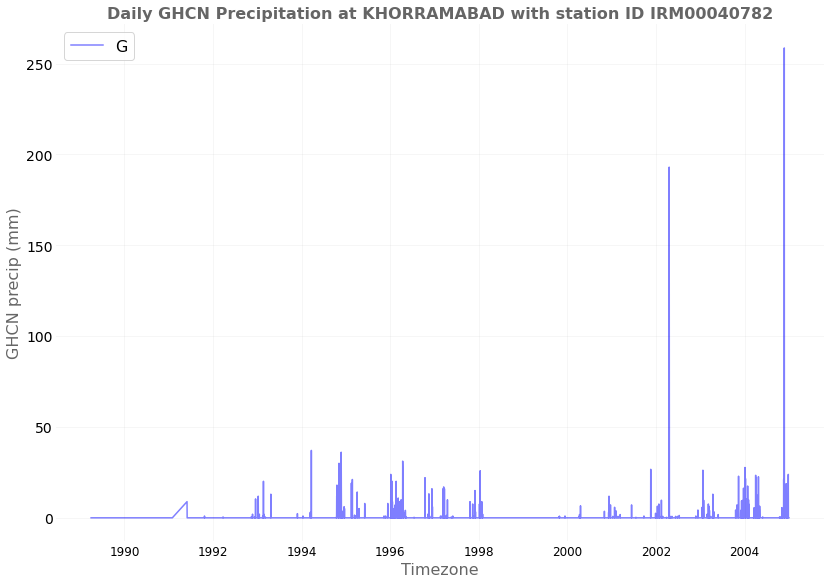

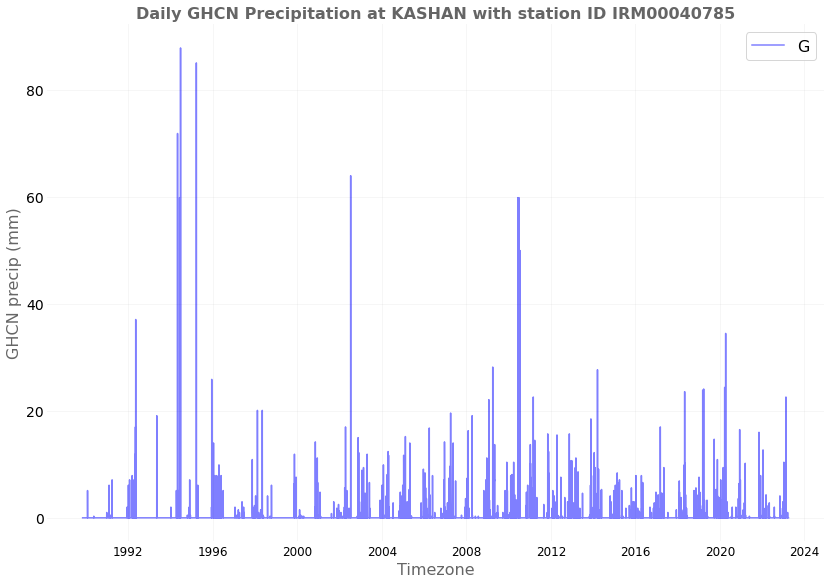

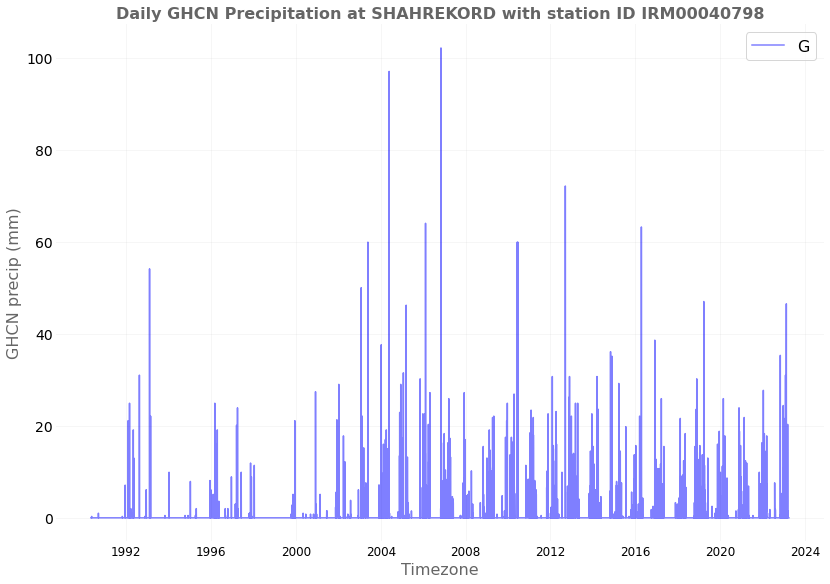

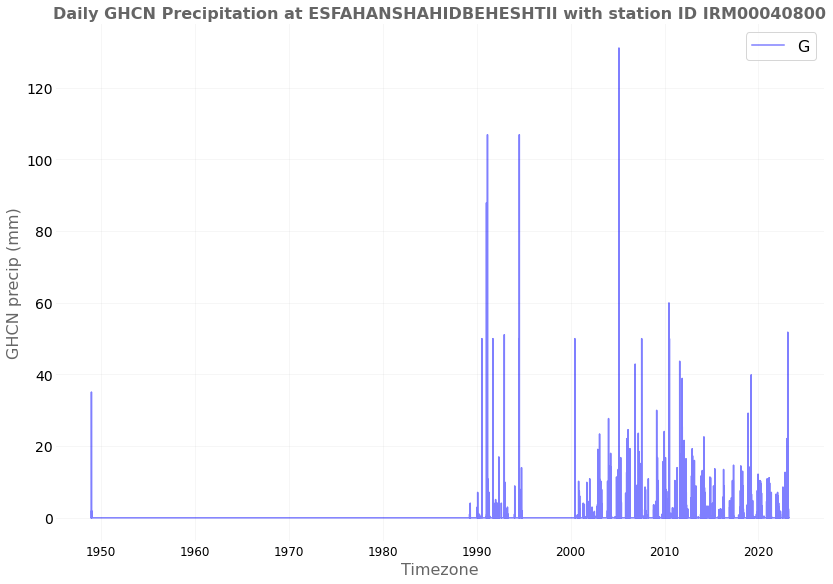

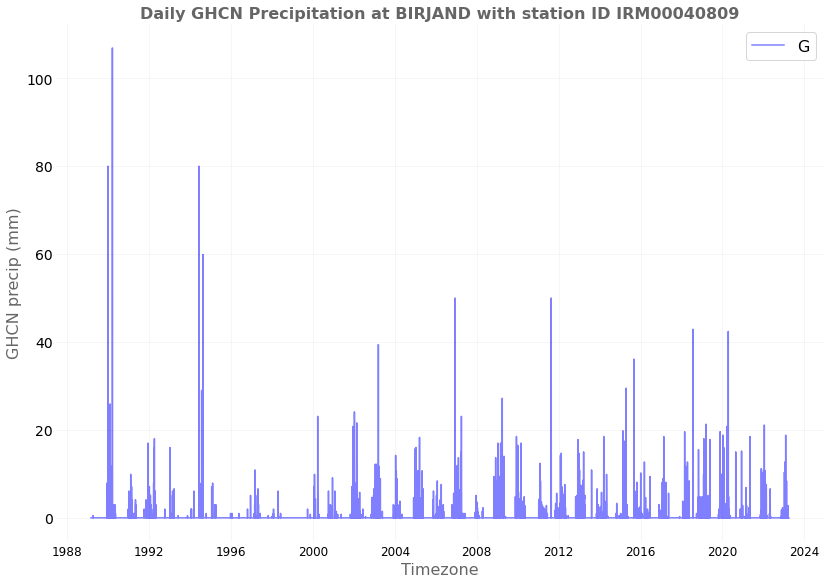

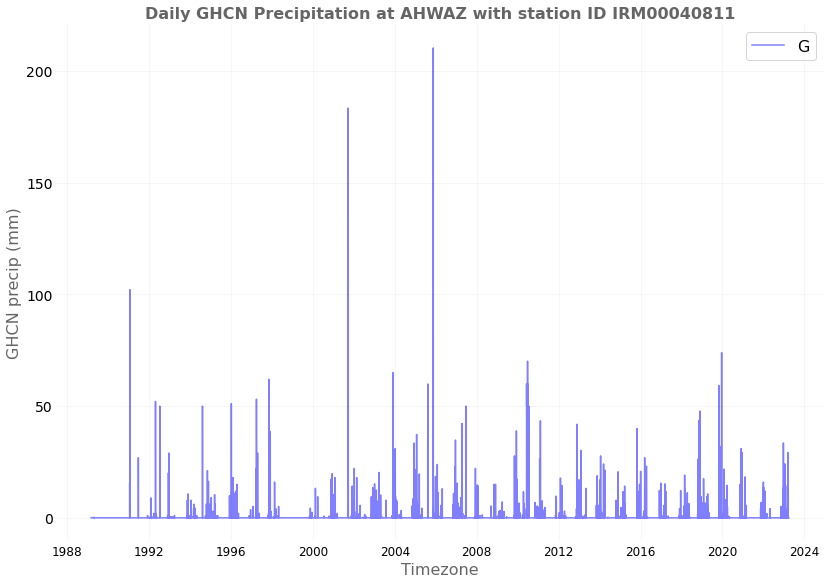

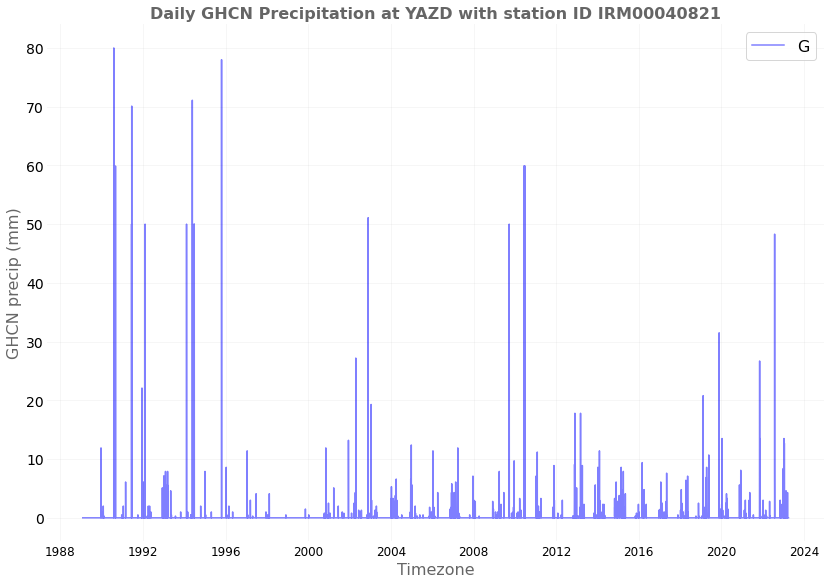

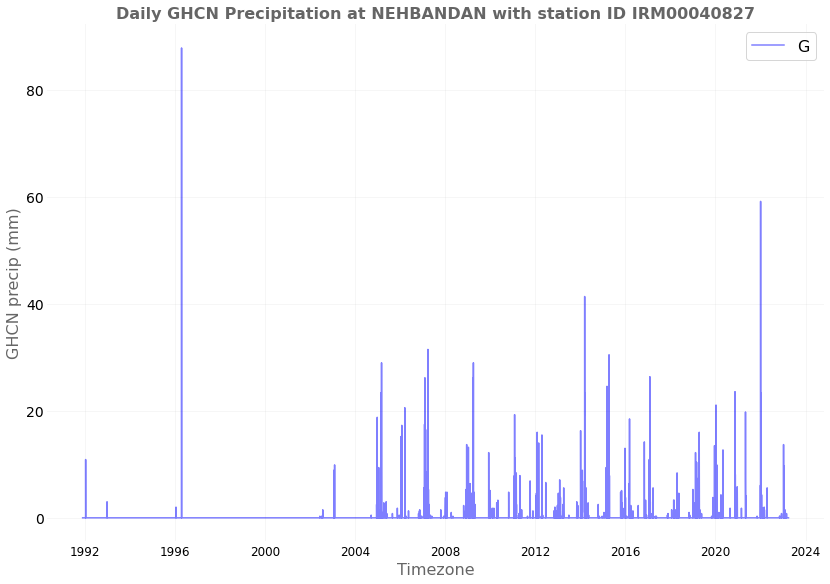

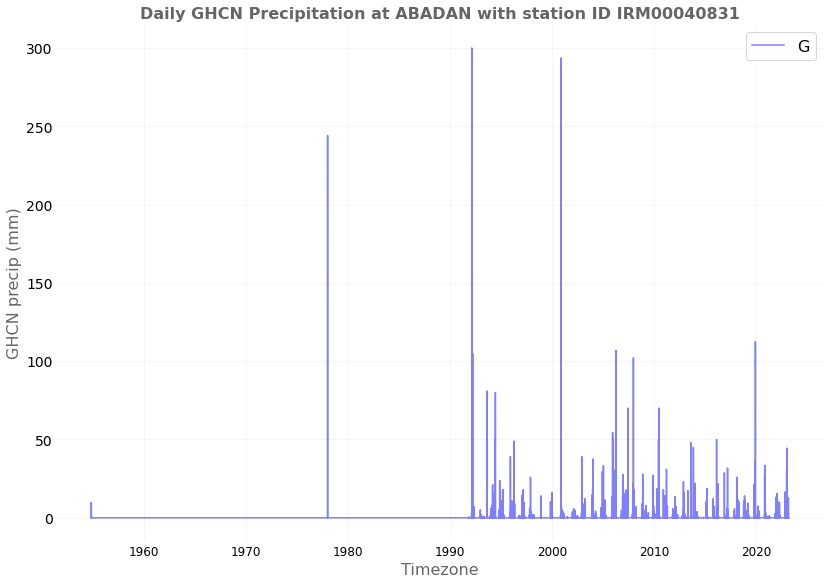

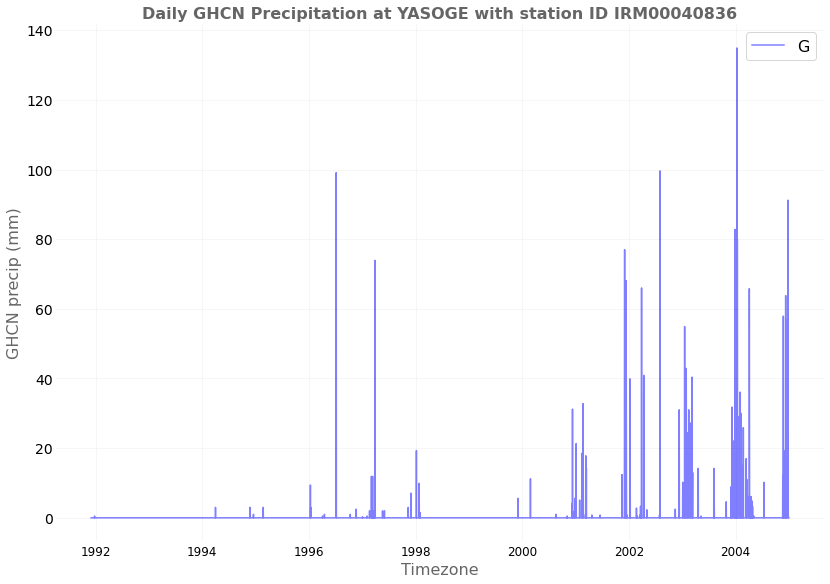

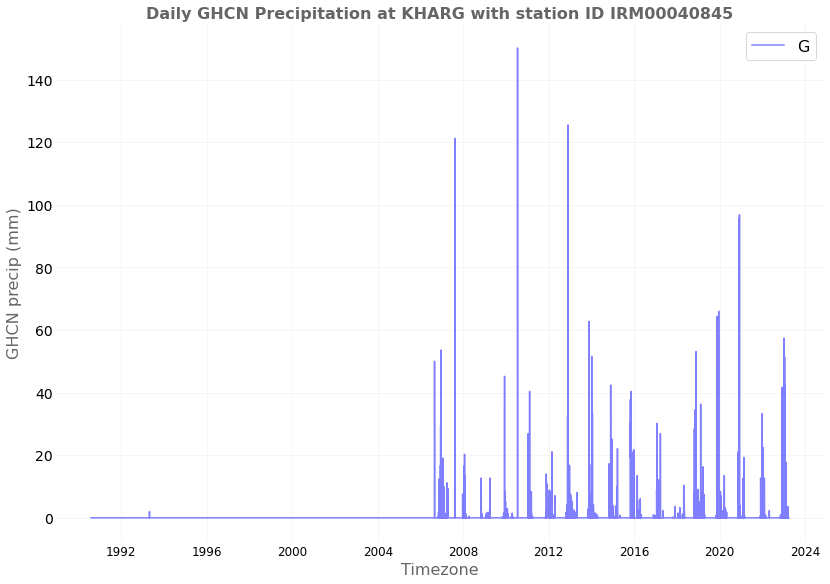

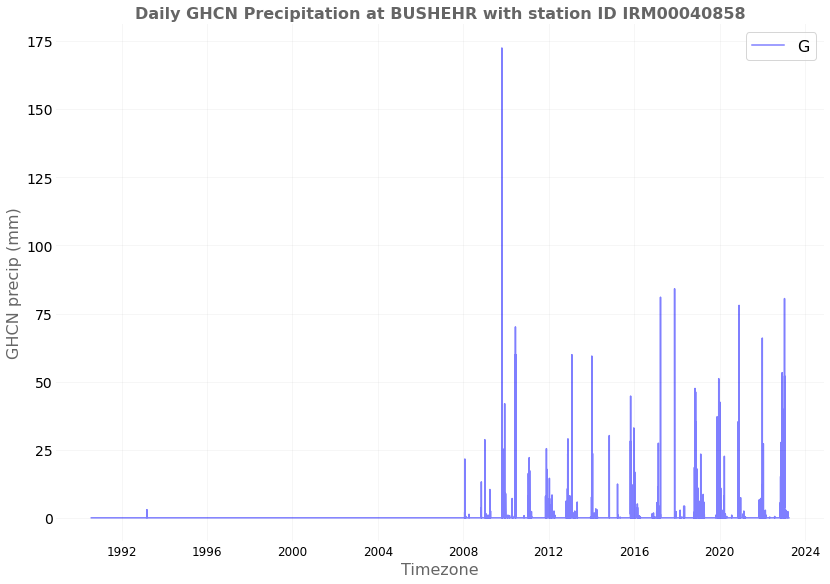

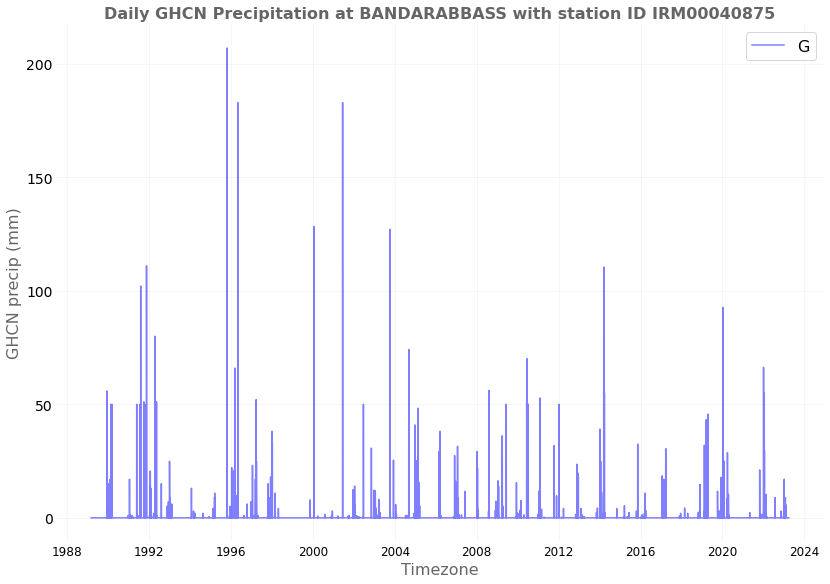

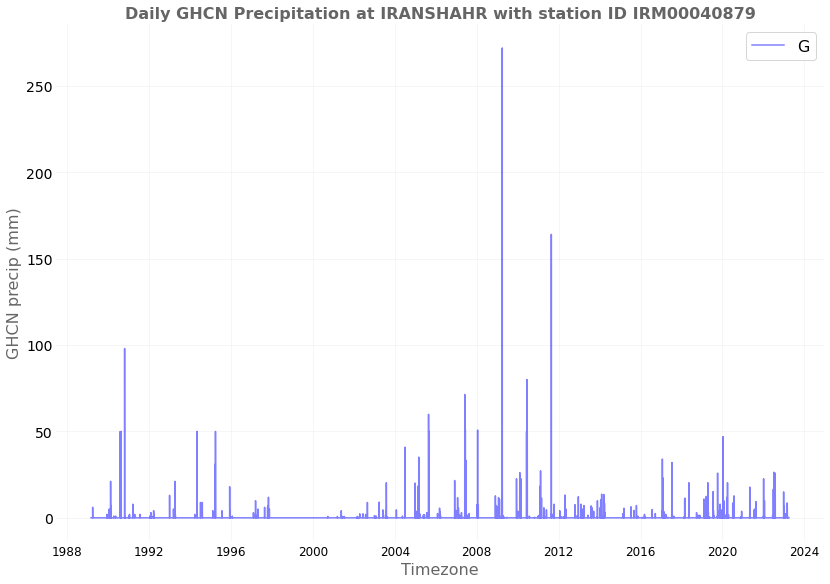

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
import datetime


for key, value in iran.iterrows():
    os.chdir(src_dir) 
    for filename in os.listdir():
        if filename.endswith('.dly'):
            file_name, file_ext = os.path.splitext(filename)
            if file_name == value[0]:
                csv_file = '{}{}'.format(file_name, '.csv')
                png_file = '{}{}'.format(file_name, '.png')
                Title = 'Daily GHCN Precipitation at {} with station ID {}'.format(value[4], value[0])
                
                # we can read each .dly file with the pd.read_table() function
                df = pd.read_table(filename)
                date_list = list()
                precip = list()
                
                # We should traverse each .dly file to access all information in it
                for key, value in df.iterrows():
                    # At the beginning of each .dly file, there is a value like IR000040706195101TMAX which shows station ID, year, and an abbreviation word of a 4 character, which can be 'PRCP', the amount of precipitation, 'TMAX', the maximum temperature for a day, 'TMIN', the minimum temperature for a day, TAVG, the temperature average for a day, or 'SNWD', the Snow depth (mm).
                    # Because in the variable of the value of each .dly file, there is 1 column, We should use value[0] to access all information
                    # As we want to calculate the amount of precipitation in each station of IRAN, We need the files which have the 'PRCP' value in this location value[0][17:21]
                    if value[0][17:21] == 'PRCP':
                        station_ID = value[0][:11] # for example IR000040706
                        yyyy = int(value[0][11:15]) # for example 1951
                        mm = int(value[0][15:17]) # for example 01
                        # According to the year and month, We can calculate the number of days for a specific month
                        days = np.arange(0, calendar.monthrange(year=yyyy, month=mm)[1])
                        # We should traverse the different days of each month to create a list of datetimes and precipitations
                        for day in days:
                            # According to the year, month and day, We can determine the date of each day
                            date_str = "{}-{}-{}".format(value[0][11:15], value[0][15:17], day + 1)
                            # We can create a datetime object using the date_str which has the sring type
                            date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d')
                            date_list.append(date_obj)
                            # To calculate the amount of precipitation for each day, we should gain the value which is in the location value[0][start:end]
                            start = 21 + 8 * day
                            end = start + 5
                            data = value[0][start:end]
                            if data == '-9999': # -9999 is a missing data
                                precip.append(0.)
                            else:
                                precip.append(float(data) / 10)
                                
                # We create a data frame for each .dly file using datetime objects. each data frame has one column which has the datetime64[ns] type
                date_df = pd.DataFrame(date_list, columns=['Date']) 
                date_df.set_index('Date', inplace=True)
                # Then We add the amount of precipitation daily to the data frame of each .dly file
                date_df['{}'.format('ghcn_precip(mm)')] = precip
                # we can convert convert a data frame objec to a csv file using .to_csv() function a comma separator by default
                date_df.to_csv(os.path.join(dst_dir.format(name), csv_file), index=True)
                
                # Plotting
                fig, ax = plt.subplots(figsize=(11.69,8.27))
                plt.grid(linewidth=1.0, linestyle='-', alpha=.1)
                ax.plot(date_df.index, date_df['{}'.format(date_df.columns[0])], color='blue', linewidth=1.5, alpha=.5)
                ax.legend('GHCN precip (mm)', ncol=1, loc= 'best', fontsize=16)
                ax.set_xlabel('Timezone', fontsize=16, alpha=.6)
                ax.set_ylabel('GHCN precip (mm)', fontsize=16, alpha=.6)
                ax.set_title(Title, fontsize=16, weight='bold', alpha=.6)
                ax.xaxis.set_tick_params(labelsize=12)
                ax.yaxis.set_tick_params(labelsize=14)
                fig.tight_layout()
                # hide ticks
                ax.tick_params(axis=u'both', which=u'both', length=0)
                # hide frames
                for spineVal in ax.spines.values():
                    spineVal.set_visible(False)
                # show plots    
                plt.show(block=False)
                
                # Create or Save the png files
                fig.savefig(fname=os.path.join(dst_dir.format(name), png_file))